Import the packages required

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from kmodes.kprototypes import KPrototypes
import pandoc

In [2]:
pd.set_option('display.max_columns', 30)

File import and exploratory analysis

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [4]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [5]:
print(df.shape)

(41188, 21)


In [6]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [7]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [8]:
print(df.isna().sum())
# there isn't any NA values in this data set, however, there are 'unknown' values in some columns

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
# get rid of all rows with unknown values
for column in df.columns:
    df = df[df[column] != 'unknown']

In [10]:
print(df.shape)

(30488, 21)


Visualization of distribution of each variable

In [11]:
sns.set(style="whitegrid")

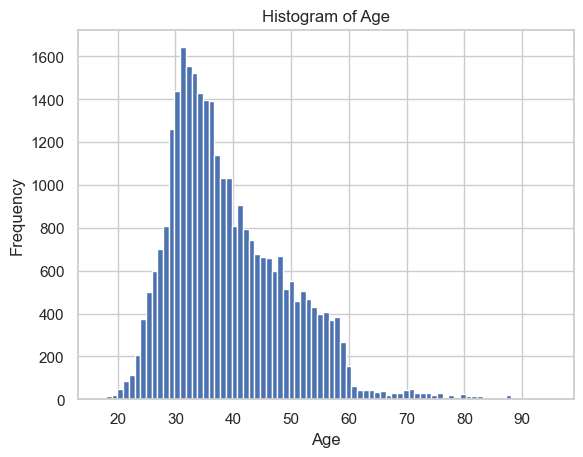

In [12]:
# age
plt.hist(df['age'], bins=max(df['age']) - min(df['age']) + 1)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

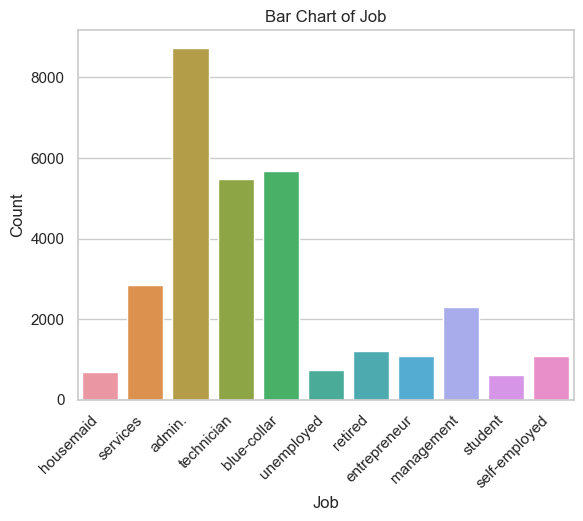

In [13]:
# job
sns.countplot(data=df, x='job')
plt.title("Bar Chart of Job")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
df.job.value_counts()

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

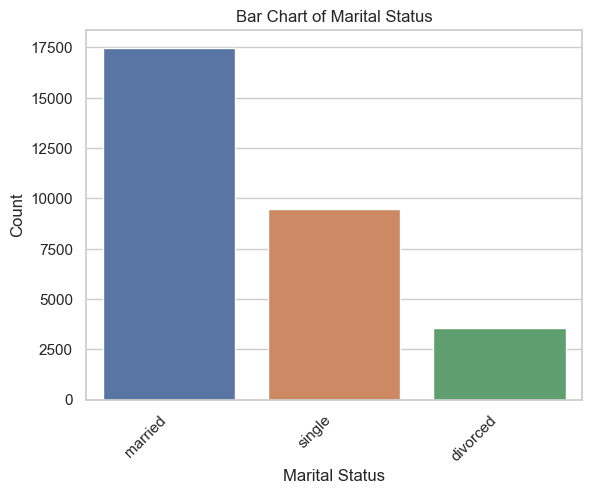

In [15]:
# marital
sns.countplot(data=df, x='marital')
plt.title("Bar Chart of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
df.education.value_counts()

university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

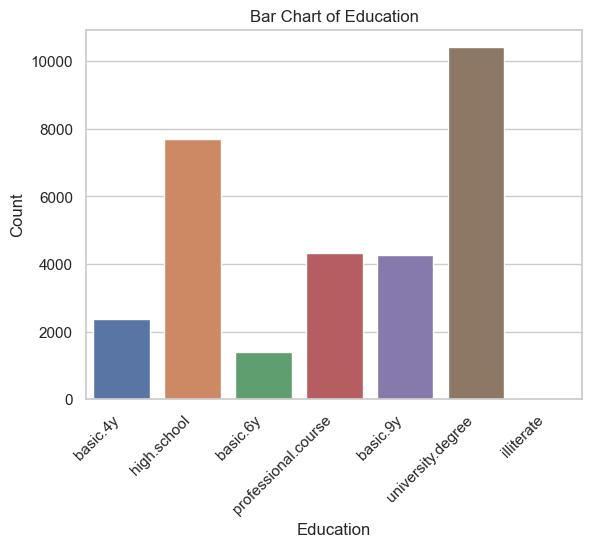

In [17]:
# education
sns.countplot(data=df, x='education')
plt.title("Bar Chart of Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

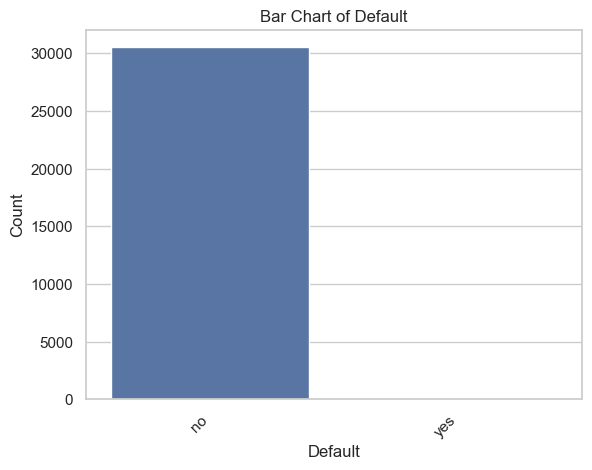

In [18]:
# default
sns.countplot(data=df, x='default')
plt.title("Bar Chart of Default")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
df.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

Since there are only three "yes" values for default, we will not keep it.

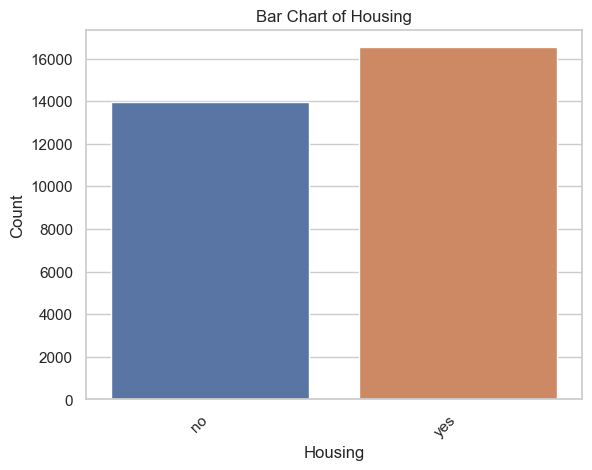

In [20]:
# housing
sns.countplot(data=df, x='housing')
plt.title("Bar Chart of Housing")
plt.xlabel("Housing")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

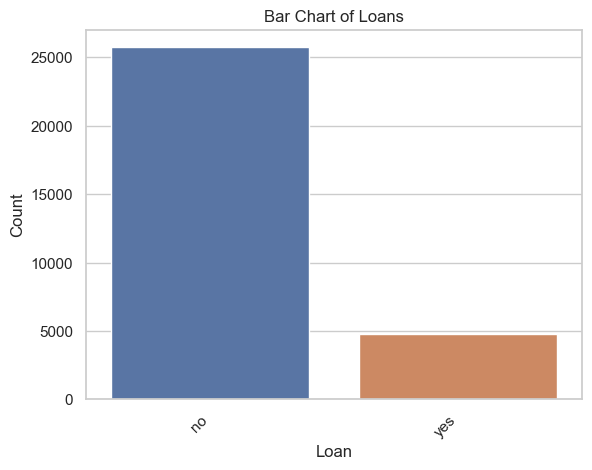

In [21]:
# loan
sns.countplot(data=df, x='loan')
plt.title("Bar Chart of Loans")
plt.xlabel("Loan")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

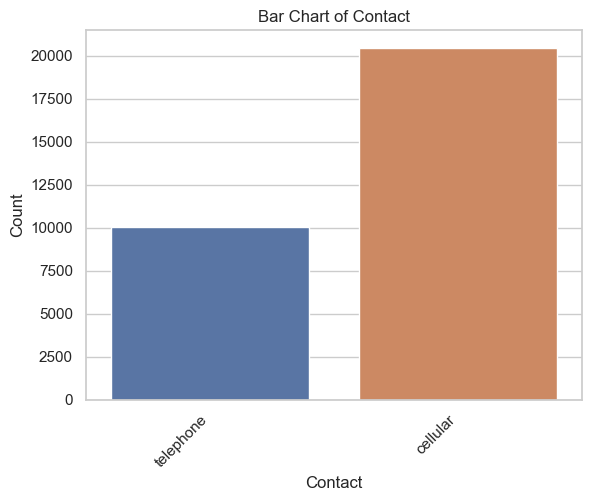

In [22]:
# contact
sns.countplot(data=df, x='contact')
plt.title("Bar Chart of Contact")
plt.xlabel("Contact")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


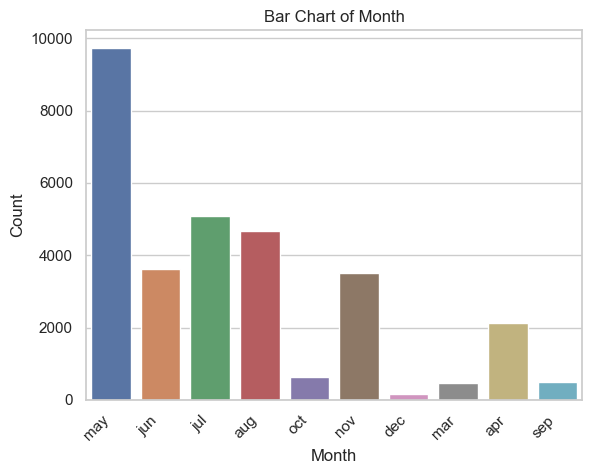

In [23]:
# month
sns.countplot(data=df, x='month')
plt.title("Bar Chart of Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

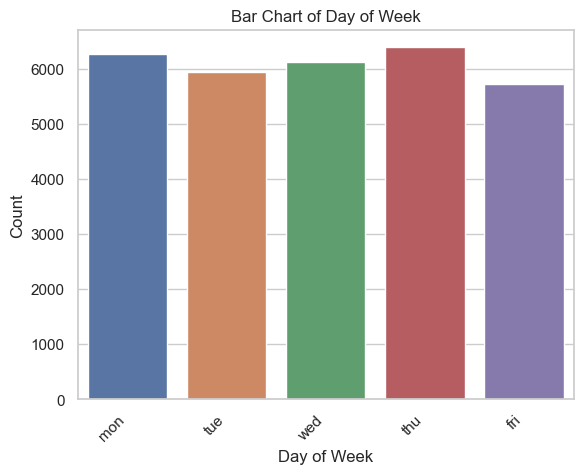

In [24]:
# day of week
sns.countplot(data=df, x='day_of_week')
plt.title("Bar Chart of Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

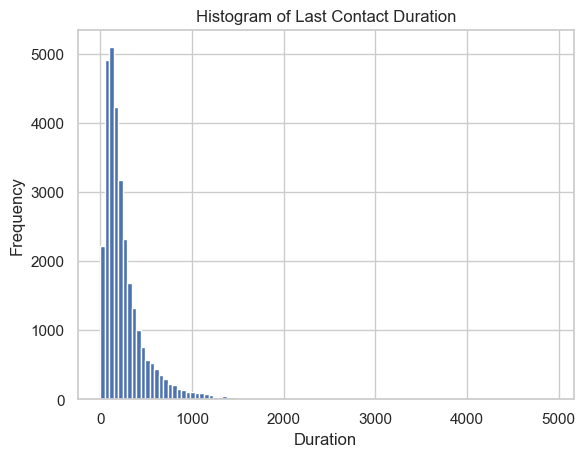

In [25]:
# duration
plt.hist(df['duration'], bins=100)
plt.title("Histogram of Last Contact Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()


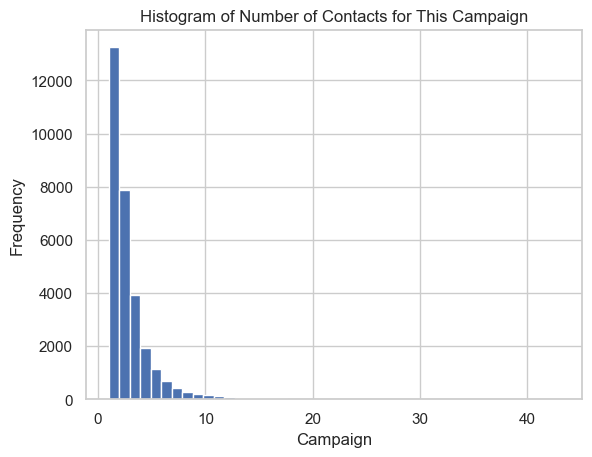

In [26]:
# campaign
plt.hist(df['campaign'], bins=max(df['campaign']) - min(df['campaign']) + 1)
plt.title("Histogram of Number of Contacts for This Campaign")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.show()

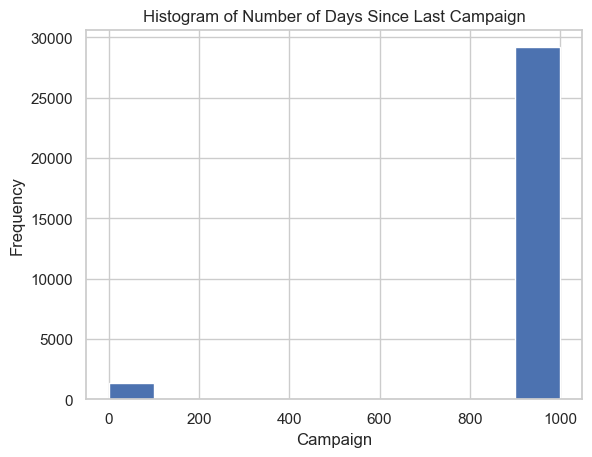

In [27]:
# pdays
plt.hist(df['pdays'])
plt.title("Histogram of Number of Days Since Last Campaign")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.show()

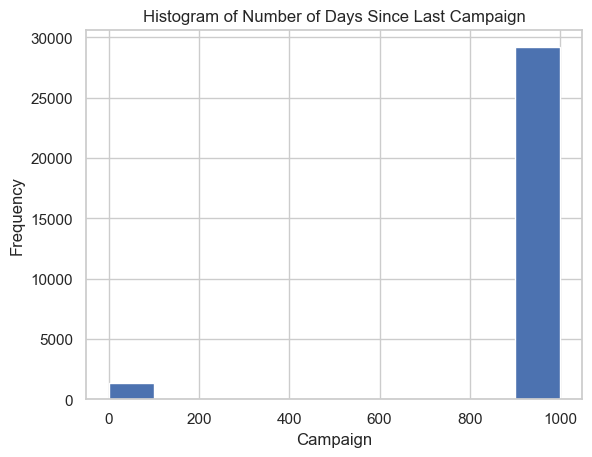

In [28]:
# pdays
plt.hist(df['pdays'])
plt.title("Histogram of Number of Days Since Last Campaign")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.show()

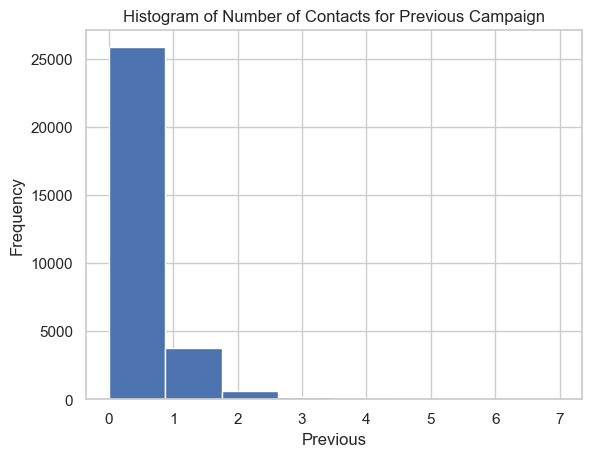

In [29]:
# previous
plt.hist(df['previous'], bins=max(df['previous']) - min(df['previous']) + 1)
plt.title("Histogram of Number of Contacts for Previous Campaign")
plt.xlabel("Previous")
plt.ylabel("Frequency")
plt.show()

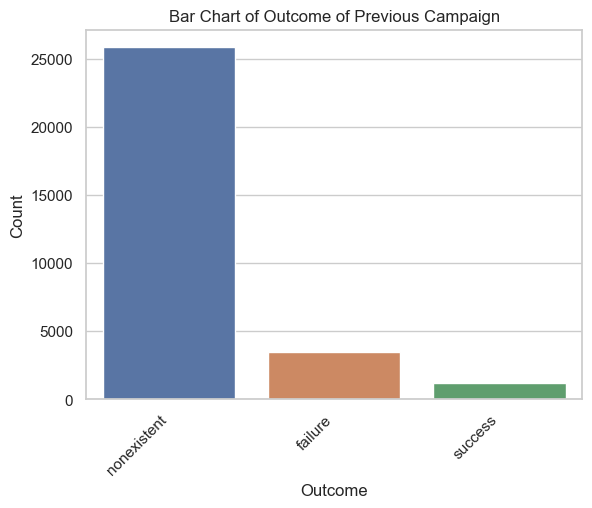

In [30]:
# poutcome
sns.countplot(data=df, x='poutcome')
plt.title("Bar Chart of Outcome of Previous Campaign")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

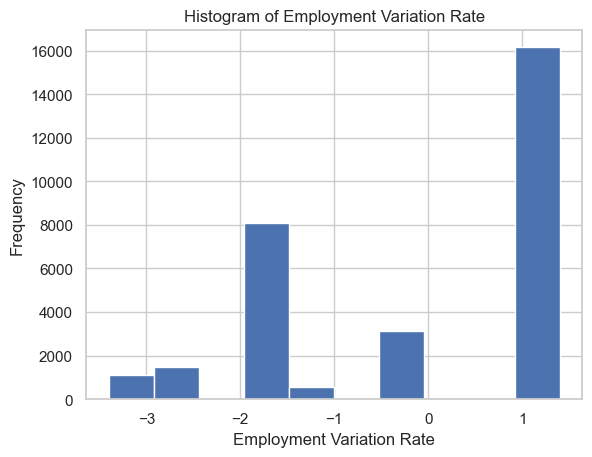

In [31]:
# emp.var.rate
plt.hist(df['emp.var.rate'])
plt.title("Histogram of Employment Variation Rate")
plt.xlabel("Employment Variation Rate")
plt.ylabel("Frequency")
plt.show()

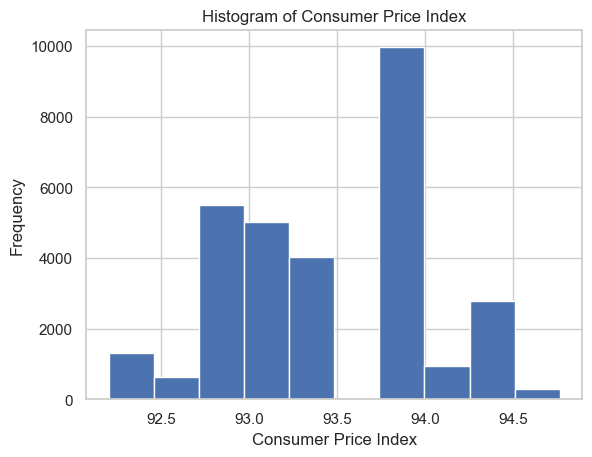

In [32]:
# cons.price.idx
plt.hist(df['cons.price.idx'])
plt.title("Histogram of Consumer Price Index")
plt.xlabel("Consumer Price Index")
plt.ylabel("Frequency")
plt.show()

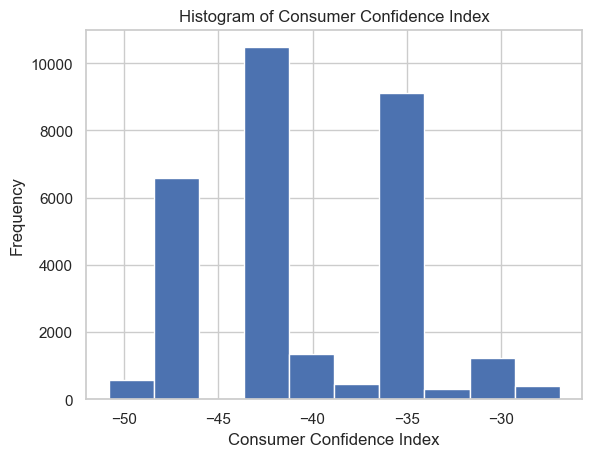

In [33]:
# cons.conf.idx
plt.hist(df['cons.conf.idx'])
plt.title("Histogram of Consumer Confidence Index")
plt.xlabel("Consumer Confidence Index")
plt.ylabel("Frequency")
plt.show()

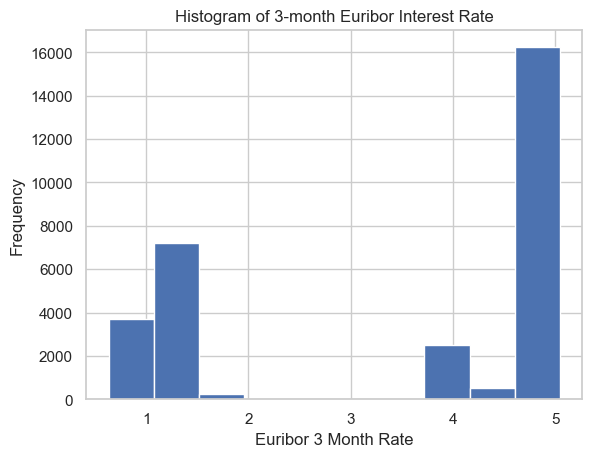

In [34]:
# euribor3m
plt.hist(df['euribor3m'])
plt.title("Histogram of 3-month Euribor Interest Rate")
plt.xlabel("Euribor 3 Month Rate")
plt.ylabel("Frequency")
plt.show()

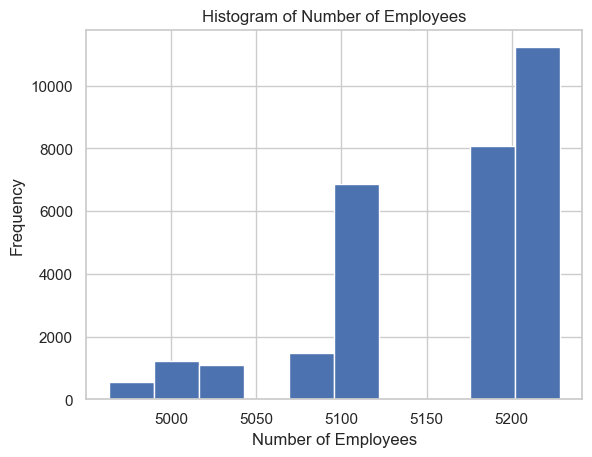

In [35]:
# nr.employed
plt.hist(df['nr.employed'])
plt.title("Histogram of Number of Employees")
plt.xlabel("Number of Employees")
plt.ylabel("Frequency")
plt.show()

In [36]:
# convert the "yes" and "no"s to 1s and 0s
df['defaultdummy'] = df.default.map({'yes': 1, 'no': 0})
df['housingdummy'] = df.housing.map({'yes': 1, 'no': 0})
df['loandummy'] = df.loan.map({'yes': 1, 'no': 0})
df['outcome'] = df.y.map({'yes': 1, 'no': 0})

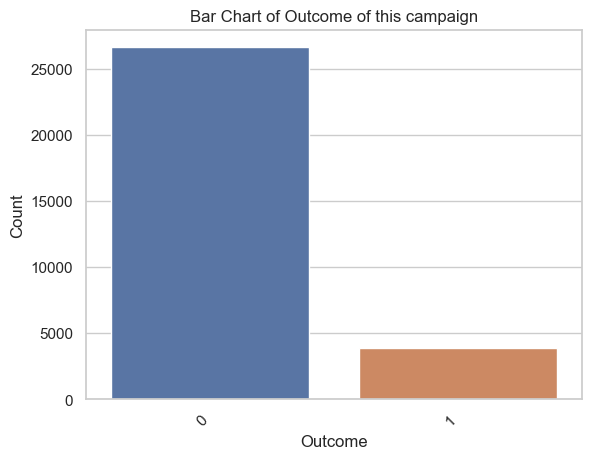

In [37]:
# outcome
sns.countplot(data=df, x='outcome')
plt.title("Bar Chart of Outcome of this campaign")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

Create a correlation matrix for all numerical variables in the data set, including the dummy variables

In [39]:
numeric = df.select_dtypes(include = "number")

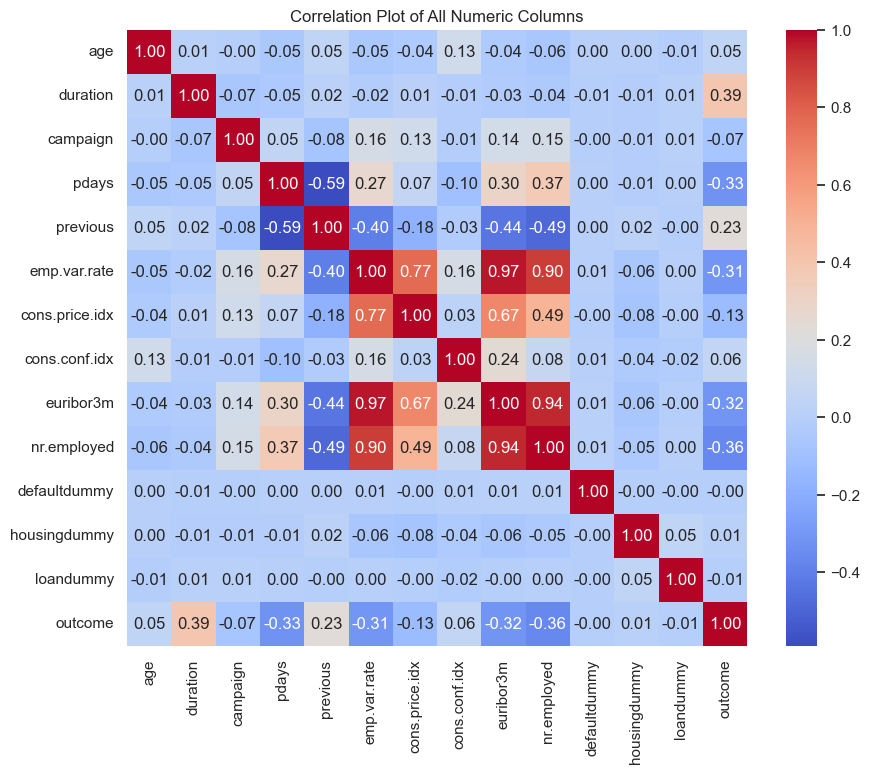

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot of All Numeric Columns")
plt.show()

K-Prototypes Clustering

In [41]:
clustercat = df[['job', 'marital', 'education', 'housing', 'loan']].astype(str)

In [42]:
kd = pd.concat([df['age'], clustercat], axis = 1)

In [43]:
# convert data frame to matrix for clustering
kproto_data = kd.values

In [44]:
# save a version of the data frame for later
kd = pd.concat([kd, df['outcome']], axis = 1)

In [45]:
print(kd.head())

   age        job  marital            education housing loan  outcome
0   56  housemaid  married             basic.4y      no   no        0
2   37   services  married          high.school     yes   no        0
3   40     admin.  married             basic.6y      no   no        0
4   56   services  married          high.school      no  yes        0
6   59     admin.  married  professional.course      no   no        0


Use Elbow Method to determine the number of clusters

In [47]:
cost = []
categorical_list = list(range(1, 6))
krange = list(range(1, 11))
gamma = []
for k in krange:
    try:
        kproto = KPrototypes(n_clusters = k, init = 'Huang',random_state = 19)
        kproto.fit_predict(kproto_data, categorical = categorical_list)
        cost.append(kproto.cost_)
        gamma.append(kproto.gamma)
        print(k)
    except:
        break

In [50]:
print(gamma)

[5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364, 5.166679879389364]


Visualize the Elbow Curve to decide how many clusters to choose

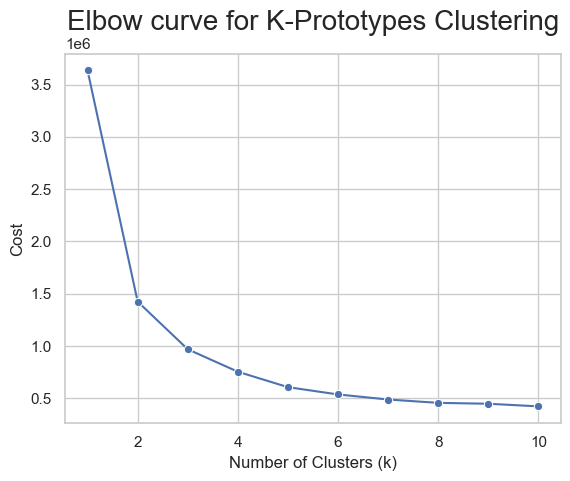

In [51]:
sns.lineplot(x = krange, y = cost, marker = 'o')
plt.title('Elbow curve for K-Prototypes Clustering', fontsize = 20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.show()


Compare the elbow curve with different gamma values

In [41]:
cost1 = []
for k in krange:
    try:
        kproto = KPrototypes(n_clusters = k, init = 'Huang',gamma = 5, random_state = 19)
        kproto.fit_predict(kproto_data, categorical = categorical_list)
        cost1.append(kproto.cost_)
        print(k)
    except:
        break

1
2
3
4
5
6
7
8
9
10


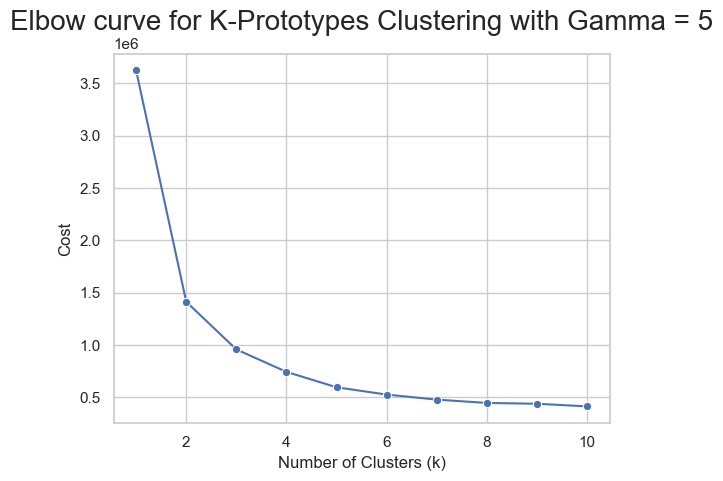

In [89]:
sns.lineplot(x = krange, y = cost1, marker = 'o')
plt.title('Elbow curve for K-Prototypes Clustering with Gamma = 5', fontsize = 20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.show()

In [52]:
cost2 = []
for k in krange:
    try:
        kproto = KPrototypes(n_clusters = k, init = 'Huang',gamma = 10, random_state = 19)
        kproto.fit_predict(kproto_data, categorical = categorical_list)
        cost2.append(kproto.cost_)
        print(k)
    except:
        break

1
2
3
4
5
6
7
8
9
10


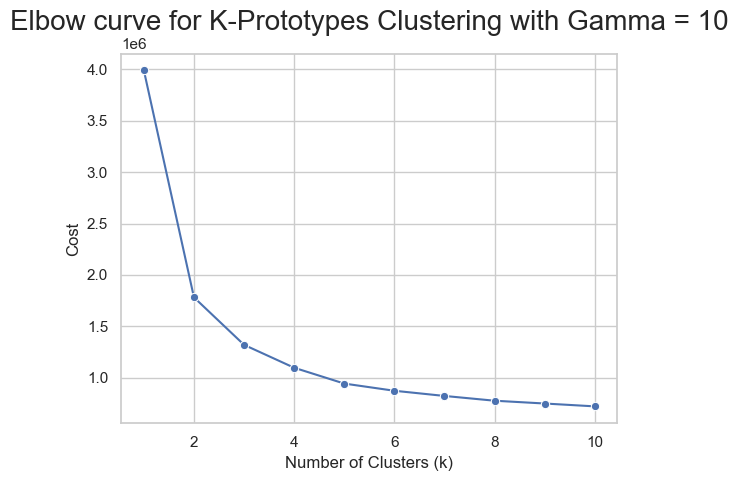

In [53]:
sns.lineplot(x = krange, y = cost2, marker = 'o')
plt.title('Elbow curve for K-Prototypes Clustering with Gamma = 10', fontsize = 20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.show()

At Gamme = 5, the clustering algorithms were centered around the only numeric variable, age. The clusters formed were almost solely based on age groups, as most clusters have identical values for the categorical variables. As a result, we will approach this with Gamma = 10.

In [48]:
# we will create k-prototypes with 3 to 8 clusters
clusterrange = list(range(3, 9))
resultlist = []

In [49]:
# form the k-prototypes clusters with gamma = 10
for k in clusterrange:
    try:
        kproto = KPrototypes(n_clusters = k, init = 'Huang',gamma = 10, random_state = 19)
        result = kproto.fit_predict(kproto_data, categorical = categorical_list)
        resultlist.append(result)
        print(k)
    except:
        break

3
4
5
6
7
8


In [50]:
resultrange = list(range(0, len(resultlist)))

In [60]:
# create the functions to aggregate the result df
numeric = kd.select_dtypes(include='number')
categorical = kd.select_dtypes(include='object')

agg_functions = {
    **{col: ('mean', 'median') for col in numeric.columns},
    **{col: (lambda x: (x.mode().iloc[0], (x == x.mode().iloc[0]).mean() * 100)) for col in categorical.columns}

}


In [61]:
# print out the mean and median of numeric variables, and the modes for the categorical variables
print(kd.agg(agg_functions).T)

                mean median                                <lambda>
age        39.030012   37.0                                     NaN
outcome     0.126574    0.0                                     NaN
job              NaN    NaN              (admin., 28.6571765940698)
marital          NaN    NaN            (married, 57.37339281028602)
education        NaN    NaN  (university.degree, 34.15114143269483)
housing          NaN    NaN                (yes, 54.18853319338757)
loan             NaN    NaN                 (no, 84.36106008921543)


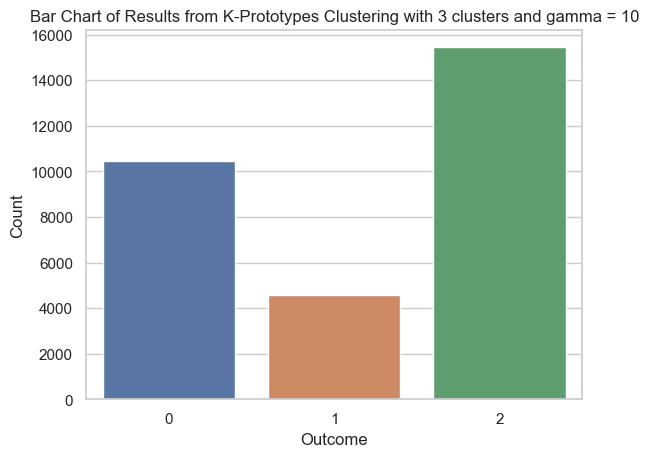

cluster3                                                 0  \
age       mean                                   42.753275   
          median                                      42.0   
outcome   mean                                    0.097829   
          median                                       0.0   
job       <lambda>             (admin., 27.54135985464282)   
marital   <lambda>            (married, 69.14985177393133)   
education <lambda>  (university.degree, 30.46762933919862)   
housing   <lambda>                (yes, 53.54308118963373)   
loan      <lambda>                 (no, 85.07220043989672)   

cluster3                                                 1  \
age       mean                                   57.346053   
          median                                      56.0   
outcome   mean                                    0.184693   
          median                                       0.0   
job       <lambda>             (retired, 25.2725686873092)   
marital

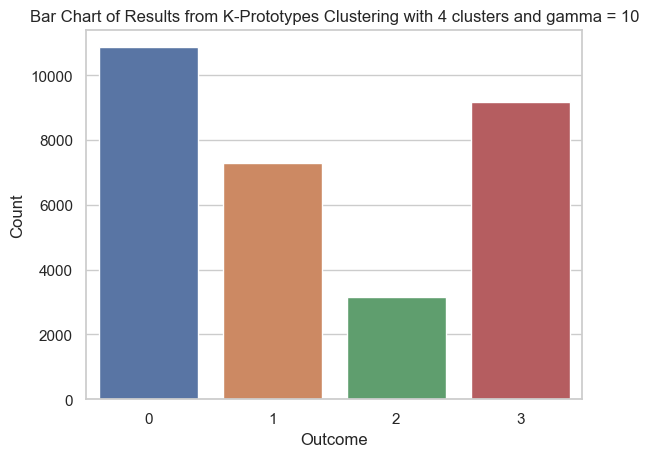

cluster4                                                  0  \
age       mean                                    36.354462   
          median                                       36.0   
outcome   mean                                     0.102484   
          median                                        0.0   
job       <lambda>             (admin., 29.420423183072675)   
marital   <lambda>             (married, 67.42410303587857)   
education <lambda>  (university.degree, 34.590616375344986)   
housing   <lambda>                  (yes, 53.9834406623735)   
loan      <lambda>                  (no, 83.95584176632934)   

cluster4                                                  1  \
age       mean                                    46.927121   
          median                                       47.0   
outcome   mean                                      0.10129   
          median                                        0.0   
job       <lambda>             (admin., 27.64205325281

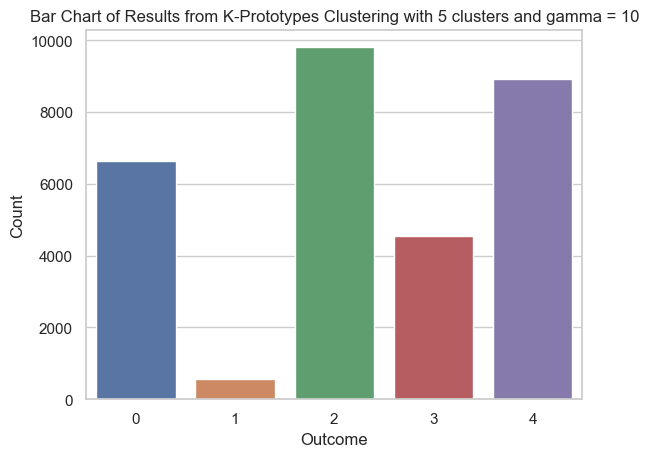

cluster5                                                  0  \
age       mean                                     44.35584   
          median                                       44.0   
outcome   mean                                     0.093896   
          median                                        0.0   
job       <lambda>              (admin., 27.65636774679729)   
marital   <lambda>             (married, 68.45516201959306)   
education <lambda>  (university.degree, 29.751318764129614)   
housing   <lambda>                 (yes, 56.63903541823663)   
loan      <lambda>                  (no, 84.77769404672193)   

cluster5                                         1  \
age       mean                           73.056042   
          median                              72.0   
outcome   mean                            0.460595   
          median                               0.0   
job       <lambda>    (retired, 86.51488616462348)   
marital   <lambda>     (married, 71.278458844

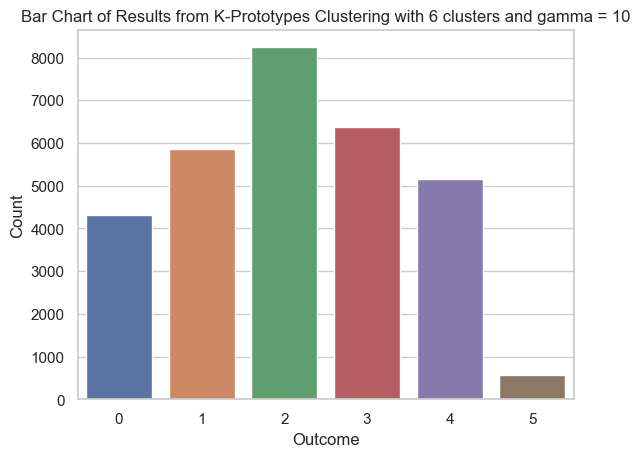

cluster6                                                 0  \
age       mean                                   54.758637   
          median                                      54.0   
outcome   mean                                    0.144911   
          median                                       0.0   
job       <lambda>             (admin., 22.37421748203107)   
marital   <lambda>             (married, 74.5420820774403)   
education <lambda>  (university.degree, 32.80779040111291)   
housing   <lambda>                (yes, 58.47437978205426)   
loan      <lambda>                 (no, 84.41919777417111)   

cluster6                                                 1  \
age       mean                                   38.632803   
          median                                      39.0   
outcome   mean                                    0.103814   
          median                                       0.0   
job       <lambda>             (admin., 34.70155635368565)   
marital

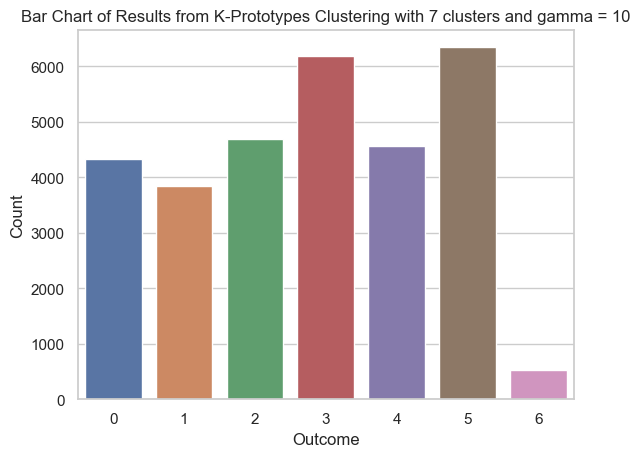

cluster7                                                 0  \
age       mean                                   47.101342   
          median                                      47.0   
outcome   mean                                    0.097409   
          median                                       0.0   
job       <lambda>             (admin., 31.07357704766312)   
marital   <lambda>            (married, 69.50485886163813)   
education <lambda>  (university.degree, 35.23831559463211)   
housing   <lambda>                 (no, 54.65062471078205)   
loan      <lambda>                 (no, 84.91439148542341)   

cluster7                                                 1  \
age       mean                                   55.425371   
          median                                      55.0   
outcome   mean                                    0.149779   
          median                                       0.0   
job       <lambda>             (admin., 21.62021359729096)   
marital

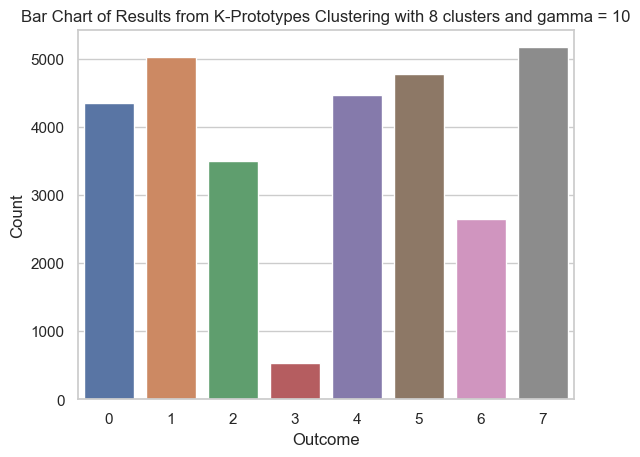

cluster8                                                 0  \
age       mean                                    47.64814   
          median                                      48.0   
outcome   mean                                    0.101056   
          median                                       0.0   
job       <lambda>        (blue-collar, 25.81534221405604)   
marital   <lambda>            (married, 71.08406063389985)   
education <lambda>  (university.degree, 31.25861276986679)   
housing   <lambda>               (yes, 60.587965089572805)   
loan      <lambda>                 (no, 84.56591639871382)   

cluster8                                                 1  \
age       mean                                   30.112192   
          median                                      30.0   
outcome   mean                                    0.146545   
          median                                       0.0   
job       <lambda>            (admin., 41.163621922160445)   
marital

<Figure size 640x480 with 0 Axes>

In [65]:
# print out the cluster centers and visualize the result of the results from different values for k
for i in resultrange:
    kd[f'cluster{i+3}'] = resultlist[i]
    sns.countplot(data=kd.sort_values(by = f'cluster{i+3}', ascending = True), x=f'cluster{i+3}')
    plt.title(f"Bar Chart of Results from K-Prototypes Clustering with {i+3} clusters and gamma = 10")
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.show()
    cluster_centers = kd.groupby(f'cluster{i+3}').agg(agg_functions).T
    print(cluster_centers)
